## Анализ данных вакансий сайта HH.ru


### 1. Общая информация

#### Описание проекта
1. Заказчик: Рекрутинговое агентство  
2. Цель проекта: предоставить рекрутинговому агентству детализированный и обоснованный анализ различий в вакансиях для Data Analysts и Data Scientists. Это позволит агентству лучше понимать требования и ожидания рынка труда для этих позиций, а также улучшить процесс подбора подходящих кандидатов.
3. Задачи: Выявить различия в предлагаемых вакансиях для Data Analystsи Data Scientists.

Исходные данные
1. Данные получены из API сайта HH.ru
2. Период предоставленных данных:

    Data Analysts:  
    min дата - 13.02.2024  
    max дата - 11.06.2024 

    Data Scientists:  
    min дата - 29.02.2024  
    max дата - 11.06.2024   

3. Для анализа дополнительно использовался сайт HH.ru



#### План работы


1 Знакомство с данными:

•	План работы.<br>
•	Импортирование необходимых библиотек.<br>
•	Загрузка данных из  xlsx-файлов.<br>
•	Проверка размерности данных (количество строк и столбцов).<br>
•	Изучение описания данных или документации для понимания смысла каждого столбца и их типов.<br>
•	Вывод первичной информации для получения общего представления о структуре и содержимом - данных. <br>

2 Предобработка входящих данных:<br>

•	Замена наименования.<br>
•	Добавление необходимых столбцов.<br>
•	Задаем функции.<br>
•	Обработка пропущенных значений.<br>
•	Обработка дубликатов.<br>
•	Изучение категориальных значений.<br>
•	Изучение количественных значений.<br>


3 Исследовательский анализ данных (EDA):

•	Выявление грейда требуемых специалистов.<br>
•	Определение доли грейдов по вакансиям Data Analysts и Data Scientists.<br>
•	Определение типичного места работы для Data Analysts и Data Scientists по следующим параметрам: ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы в разрезе грейдов .<br>
•	Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.<br>
•	Определение наиболее желаемых кандидатов на вакансии Data Analysts и Data Scientists по следующим параметрам: самые важные hard-skils, самые важные soft-skils в разрезе грейдов.<br>
•	Расчет помесячной динамики количества вакансий для Data Analysts и Data Scientists. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.<br>

4 Общий вывод и рекомендации.<br>



#### Описание данных

`id` - Уникальный идентификатор вакансии.<br>
`name` - Название вакансии.<br>
`published_at` - Дата публикации.<br>
`alternate_url` - Ссылка на вакансию.<br>
`type` - Статус вакансии на момент получения данных от api и передачи 
их в базу. <br>
`employer` - Работодатель.<br>
`department` - Работодатель, отдел.<br>
`area` - Регион места работы.<br>
`experience` - Требуемый опыт работы.<br>
`key_skills`- Ключевые навыки, в том числе найденные при анализе <br>
`полного` текста вакансии. Поле генерируется после получения 
информации от api. <br>
`schedule` - График работы.<br>
`employment` - Тип занятости.<br>
`description` - Описание вакансии.<br>
`description_lemmatized` - Лемматизированное описание вакансии.<br>
`salary_from` - Нижняя граница предлагаемой заработной платы.<br>
`salary_to` - Верхняя граница предлагаемой заработной платы.<br>
`salary_bin` - Категория зарплаты.<br>
`key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии
`key_skills`.<br>
`hard_skills_from_description` - “Твердые” навыки, найденные при 
обработке полей с навыками. Поле генерируется после получения 
информации от api. soft_skills_from_description - “Мягкие” навыки, 
найденные при обработке полей с навыками. Поле генерируется после 
получения информации от api.<br>
`soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. При желании можно дополнить.

### Знакомство с данными

In [1]:
# загрузка необходимых библиотек
import pandas as pd #прочитали библиотеку pandas
import matplotlib.pyplot as plt #прочитали библиотеку matplotlib
import seaborn as sns #прочитали библиотеку seaborn
import numpy as np #прочитали библиотеку numpy
import re # функционал для работы с регулярными выражениями
import ast
from datetime import datetime, timedelta # модуль из стандартной библиотеки Python
# используются для работы с датами и временем 
# (создание, изменение и сравнение дат и временных интервалов)
from collections import Counter # для подсчета хеш-объектов (неизменяемых, таких как строки, числа, кортежи и т.д.)
# для подсчетов количества появлений неизменяемых элементов в последовательностях
pd.set_option('display.float_format', '{:,.2f}'.format) # формат представления чисел избавили от лишних знаков после запятых
import ast
from collections import Counter

In [2]:
#считываем данные из файлов
da, ds = ( pd.read_excel('./vacancies_da.xlsx'),
                            pd.read_excel('./vacancies_ds.xlsx'))

#### Функция `inspect(df)`
Пошаговое объяснение функции

1. Отображает первые 5 строк DataFrame df, чтобы дать представление о данных.
2. Выводит информацию о DataFrame, включая количество ненулевых значений и типы данных для каждого столбца.
3. Выводит количество дублирующихся строк в DataFrame df.
5. Отображает описательную статистику describe для числовых столбцов df.
6. Преобразует имена столбцов DataFrame df в нижний регистр и заменяет пробелы на подчеркивания. Это помогает стандартизировать имена столбцов и облегчить их использование в дальнейшем анализе.
7. Удаляет столбцы hard_skills_from_description и soft_skills_from_description.
8. Преобразование столбца published_at в формат даты.
9. Выводит минимальную дату.
10. Выводит максимальную дату.

In [3]:
def inspect(df):
    def print_separator():
        print(100 * '*')
    
    # Вывод первых нескольких строк DataFrame
    display(df.head()) 
    print_separator()
    
    # Вывод количества дубликатов
    print('Количество дубликатов -', df.duplicated().sum())
    print_separator()
    
    # Вывод статистики для числовых столбцов
    numeric_columns = df.describe().columns
    display(df.describe())
    print_separator()
    
    # Вывод доли пропущенных значений для каждого столбца, сортировка и фильтрация
    missing_values_ratio = df.isna().mean() * 100
    missing_values_ratio = missing_values_ratio[missing_values_ratio > 0].sort_values(ascending=False)
    
    print("Доля пропущенных значений (в процентах):")
    print(missing_values_ratio)
    print_separator()
    
    # Преобразование имен столбцов в нижний регистр и замена пробелов на подчеркивания
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    
    # Удаление столбцов hard_skills_from_description и soft_skills_from_description
    columns_to_drop = ['hard_skills_from_description', 'soft_skills_from_description']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Вывод информации о DataFrame
    df.info() 
    print_separator()
    
    # Преобразование столбца 'published_at' в формат datetime
    if 'published_at' in df.columns:
        df['published_at'] = pd.to_datetime(df['published_at'])
        
        # Извлечение минимальной и максимальной даты в формате date
        min_date_df = df['published_at'].min().date()
        max_date_df = df['published_at'].max().date()
        
        print(f"Минимальная дата в 'published_at': {min_date_df}")
        print(f"Максимальная дата в 'published_at': {max_date_df}")
        print_separator()
    
    return df

#### Обзор файла vacancies_da - Data Analysts

In [4]:
# Обзор файла c вакансиями Аналитиков данных 
da = inspect(da)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"90,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


****************************************************************************************************
Количество дубликатов - 0
****************************************************************************************************


,id,salary_from,salary_to
count,"1,801.00",348.00,228.00
mean,"97,226,464.30","109,525.09","153,846.71"
std,"2,894,521.85","63,011.34","97,255.74"
min,"77,992,314.00",50.00,"25,000.00"
25%,"95,448,125.00","70,000.00","85,000.00"
50%,"97,356,356.00","90,000.00","120,000.00"
75%,"99,425,261.00","137,750.00","200,000.00"
max,"101,746,482.00","398,000.00","497,500.00"


****************************************************************************************************
Доля пропущенных значений (в процентах):
salary_to                          87.34
salary_from                        80.68
hard_skills_from_description       76.79
department                         71.07
soft_skills_from_description       67.35
key_skills_from_key_skills_field   39.31
dtype: float64
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     

##### Вывод по обзору файла vacancies_da - Data Analysts

В распоряжении предоставлен файл vacancies_da.xlsx.<br> Файл имеет 1801 строку и 18 столбцов.<br> 
В данных есть пропуски.<br> 
Тип данных столбцов: datetime64(1), float64(2), int64(1), object(16)<br> 
salary_from min	 аномальное значение 50.00 
Минимальная дата в 'published_at': 2024-02-13<br> 
Максимальная дата в 'published_at': 2024-06-11<br> 
Полных дублей нет.

#### Обзор файла vacancies_ds - Data Scientists

In [5]:
ds = inspect(ds)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,"350,000.00",NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление


****************************************************************************************************
Количество дубликатов - 0
****************************************************************************************************


,id,salary_from,salary_to
count,974.00,88.00,82.00
mean,"96,676,258.51","162,650.77","262,430.10"
std,"3,247,066.13","79,280.23","121,160.49"
min,"67,411,146.00","25,000.00","25,000.00"
25%,"94,827,188.75","100,000.00","192,500.00"
50%,"96,715,521.00","150,000.00","292,500.00"
75%,"98,936,095.50","200,000.00","350,000.00"
max,"101,734,119.00","350,000.00","550,000.00"


****************************************************************************************************
Доля пропущенных значений (в процентах):
salary_to                          91.58
salary_from                        90.97
soft_skills_from_description       69.82
department                         57.60
hard_skills_from_description       53.90
key_skills_from_key_skills_field   46.51
dtype: float64
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     97

##### Вывод по обзору файла vacancies_ds - Data Scientists

В распоряжении предоставлен файл vacancies_ds.xlsx.<br> Файл имеет 974 строки и 18 столбцов.<br> 
В данных есть пропуски.<br> 

Тип данных столбцов: datetime64(1), float64(2), int64(1), object(16)<br> 
Минимальная дата в 'published_at': 2024-02-29<br> 
Максимальная дата в 'published_at': 2024-06-11<br> 
Полных дублей нет.

#### Вывод по знакомству с данными

1. В распоряжении предоставлены два файла в формате xlsx:

 - vacancies_da.xlsx  - вакансии Data Analysts
 - vacancies_ds.xlsx  - вакансии Data Scientists
 
2. В данных есть пропуски<br> 

Столбцы с большой долей пропущенных значений:
 - salary_to  
 - salary_from  
 - soft_skills_from_description  
 - department  
 - hard_skills_from_description - дропнули  
 - key_skills_from_key_skills_field - дропнули  

3. Для знакомства с даными применили функцию `inspect`

### Предобработка данных

##### Cтолбец 'direction' 
Добавляем столбец 'direction' в начало DataFrame и заполняем его значением 'da' и 'ds'

In [6]:
da.head(1)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД"


In [7]:
# Добавление столбца 'direction' в начало DataFrame и заполнение его значением 'da' и 'ds'
da.insert(0, 'direction', 'da')
ds.insert(0, 'direction', 'ds')

In [8]:
da.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД"


In [9]:
ds.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,ds,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN


#### Объединяем файлы da и ds

In [10]:
df = pd.concat([da, ds], axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 0 to 973
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   direction                         2775 non-null   object        
 1   id                                2775 non-null   int64         
 2   name                              2775 non-null   object        
 3   published_at                      2775 non-null   datetime64[ns]
 4   alternate_url                     2775 non-null   object        
 5   type                              2775 non-null   object        
 6   employer                          2775 non-null   object        
 7   department                        934 non-null    object        
 8   area                              2775 non-null   object        
 9   experience                        2775 non-null   object        
 10  key_skills                        2775 non-null  

In [12]:
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД"


In [13]:
df.tail(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
973,ds,99973974,Middle/Senior Data Scientist (блок Управление ...,2024-05-23 16:29:00,https://hh.ru/vacancy/99973974,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),"['Pandas', 'Документация', 'Аналитическое мышл...",Полный день,Полная занятость,в нашей команде вы получите возможность работа...,наш команда получать возможность работать созд...,NaN,NaN,ЗП не указана,NaN


##### Вывод по объединению файлов da и ds
Файлы da и ds данные не потерялись. Общее количество строк -  2775 и 20 столбцов.

#### Преобразование значений столбцов

##### Привел значения в столбце 'key_skills' к нижнему регистру

In [14]:
# Приведение значений в столбце 'key_skills' к нижнему регистру
df['key_skills'] = df['key_skills'].str.lower()

##### Заменил наименование

In [15]:
# Замена 'Data Scientist (Midlle)' на 'Data Scientist (Middle)' в столбце 'name'
df['name'] = df['name'].replace('Data Scientist (Midlle)', 'Data Scientist (Middle)')

In [16]:
# Словарь с парами значений для замены
replace_key_skills = {
    'computer vision': 'cv',
    'английский язык': 'english',
    'ms excel': 'excel',
    'machine learning': 'ml',
    'MLFlow': 'mlflow',
    'powerbi': 'power bi',
    'ms power bi': 'power bi',
    'apache airflow': 'airflow',
    'atlassian confluence': 'confluence',
    'работа с базами данных': 'субд'
}

# Замена подстрок в столбце 'key_skills' с использованием цикла
for old_value, new_value in replace_key_skills.items():
    df['key_skills'] = df['key_skills'].str.replace(old_value, new_value, case=False)

In [17]:
# Проверка замены 'Data Scientist (Midlle)' на 'Data Scientist (Middle)' в столбце 'name'
df.loc[df['id'] == 97653267]

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
751,ds,97653267,Data Scientist (Middle),2024-04-22 18:38:03,https://hh.ru/vacancy/97653267,Открытая,ЦЕНТРОФИНАНС,NaN,Санкт-Петербург,Junior+ (1-3 years),"['python', 'scipy', 'sql', 'mathematical stati...",Удаленная работа,Полная занятость,центрофинанс (для друзей просто ц.) — федераль...,центрофинанс друг просто ц федеральный финансо...,"150,000.00","180,000.00",От 100 тысяч до 200 тысяч,"Python, SQL, SciPy, Mathematical Statistics, Г..."


In [18]:
# Проверка замены 'английский язык' на 'English' в столбце 'key_skills' и квадратных скобок
df.loc[df['id'] == 100077910]

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
11,da,100077910,Data Analyst / Data Scientist,2024-06-11 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['linux', 'sql', 'бизнес-анализ', 'hadoop', 'b...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,"350,000.00",NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,..."
4,ds,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['datalens', 'ms sql', 'sql', 'spark', 'аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,"350,000.00",NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,..."


##### Заменил значение

In [19]:
# Фильтрация строк по значению в столбце 'id' и замена значения в столбце 'salary_from'
df.loc[df['id'] == 96943446, 'salary_from'] = df.loc[df['id'] == 96943446, 'salary_from'].replace(50, 50000)

In [20]:
# Проверка замены значения зарплаты
df.loc[df['id'] == 96943446]

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
1110,da,96943446,Аналитик данных в отдел развития на маркетплейсах,2024-05-11 21:45:07,https://hh.ru/vacancy/96943446,Открытая,Репетуев Иван Дмитриевич,NaN,Москва,Junior (no experince),"['аналитическое мышление', 'аналитика продаж',...",Удаленная работа,Полная занятость,ищу в команду аналитика до глубины мозга косте...,искать команда аналитик глубина мозг кость име...,"50,000.00","100,001.00",От 100 тысяч до 200 тысяч,"Аналитика продаж, Конкурентная аналитика, Анал..."


##### Вывод по преобразованию значений столбцов

1. Приведение значений в столбце 'key_skills' к нижнему регистру
2. Заменил точечно наименования в столбцах name, key_skills
3. Заменил точечно значение в столбце salary_from

####  Задаем функции

#####  display_unique_values
 Функция отображает количество уникальных значений для нечисловых столбцов DataFrame

In [21]:
def display_unique_values(df):
    """
    Функция отображает количество уникальных значений для нечисловых столбцов DataFrame.
    
    Parameters:
    df (pd.DataFrame): Входной DataFrame.
    """
    # Получение списка числовых столбцов
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for column_name in df.columns:
        if column_name not in numeric_columns:
            # Отображение количества уникальных значений для нечисловых столбцов
            print(f"Уникальные значения в столбце '{column_name}':")
            display(df[column_name].value_counts())
            print(100* '*')

#####  `analyze_missing_values`
Функция анализирует пропуски в DataFrame, отображая долю и количество пропусков по столбцам.
  

In [22]:
def analyze_missing_values(df):
    """
    Функция анализирует пропуски в DataFrame, отображая долю и количество пропусков по столбцам.
    
    Parameters:
    df (pd.DataFrame): Входной DataFrame.
    """
    # Доля пропусков NAN по столбцам с сортировкой
    print('Доля пропусков NAN по столбцам:')
    nan_ratio = df.isna().mean().sort_values(ascending=False)
    print(nan_ratio)
    print(100 * '*')
    
    # Количество пропусков NAN по столбцам с сортировкой и условием
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_count = nan_count[nan_count > 0]

    if not nan_count.empty:
        print('Количество пропусков NAN по столбцам:')
        display(nan_count)

##### `determine_experience`
Функция determine_experience предназначена для заполнения столбца experience_new на основе информации, содержащейся в столбце name и, при необходимости, в столбце experience. Она анализирует строку name и определяет уровень опыта (например, Middle или Senior) в зависимости от наличия определенных ключевых слов.

In [23]:
# Функция для заполнения столбца experience_new
def determine_experience(row):
    name = row['name'].lower()
    if re.search(r'middle\+.*senior|senior.*middle\+', name):
        return 'Senior (6+ years)'
    elif 'middle' in name and 'senior' in name:
        return 'Middle (3-6 years)'
    elif 'middle' in name:
        return 'Middle (3-6 years)'
    elif 'senior' in name:
        return 'Senior (6+ years)'
    else:
        return row['experience']

##### `check_skills`
Функция является часть для заполнения столбцов `soft` и `hard`


In [24]:
# Функция check_skills сравнивает списки харт и софт скилов со столбцом key_skills_list.
# Если не находит, то дополнительно проверяет столбец description и пытается в нем найти софты и харды из списка.
def check_skills(skills, skills_list):
    if skills is None or (isinstance(skills, float) and pd.isna(skills)) or skills == '':
        return 'no info'
    if not isinstance(skills, list):
        print(f"Некорректный тип данных: {skills}")
        return 'ошибка'
    try:
        found_skills = []
        skills_lower = [skill.lower().strip() for skill in skills]
        for skill in skills_list:
            if not isinstance(skill, str):
                print(f"Некорректное значение в skills_list: {skill}")
                continue
            if skill.lower() in skills_lower:
                found_skills.append(skill)
        return ', '.join(found_skills) if found_skills else 'no info'
    except Exception as e:
        print(f"Ошибка: {e}")
        return 'ошибка'

##### `split_description`
Функция для разбиения строки description на список навыков

In [25]:
# Функция для разбиения строки description на список навыков
def split_description(description):
    if pd.isna(description) or description == '':
        return []
    # Извлекаем слова, разделенные запятыми, до первого вхождения слова "условия"
    skills_part = re.split(r'условия', description, flags=re.IGNORECASE)[0]
    return re.split(r'[,\s;]+', skills_part.strip().lower())

##### `parse_skills`
Функция для конвертации строки в список

In [26]:
def parse_skills(skill_str):
    '''
    Функция для конвертации строки в список
    '''
    try:
        return ast.literal_eval(skill_str)
    except (ValueError, SyntaxError):
        return []

##### `get_unique_skills`
Функция для обработки DataFrame и получения уникальных значений в столбце 'key_skills'

In [27]:
def get_unique_skills(df):
    '''
    Функция для обработки DataFrame и получения уникальных значений в столбце 'key_skills'
    '''
    # Преобразование имен столбцов в нижний регистр и замена пробелов на подчеркивания
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    
    # Удаление столбцов hard_skills_from_description и soft_skills_from_description
    columns_to_drop = ['hard_skills_from_description', 'soft_skills_from_description']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    
    # Преобразование столбца 'key_skills' в списки
    df['key_skills'] = df['key_skills'].apply(parse_skills)
    
    # Разворачивание списков в отдельные строки
    all_skills = df['key_skills'].explode()
    
    # Получение уникальных значений
    return all_skills.dropna()

#####  `analyze_skills`
Функция analyze_skills анализирует навыки (hard или soft skills) в вакансиях по определенному направлению (например, Data Analysis или Data Science) и по уровням опыта (грейдам). Она подсчитывает частоту упоминания каждого навыка для каждого уровня опыта и возвращает результирующий DataFrame с этой информацией.

In [28]:
def analyze_skills(df, direction, skill_type):
    '''
    Функция analyze_skills анализирует навыки (hard или soft skills) в вакансиях по определенному 
    направлению (например, Data Analysis или Data Science) и по уровням опыта (грейдам). 
    Она подсчитывает частоту упоминания каждого навыка для каждого уровня опыта и возвращает результирующий 
    DataFrame с этой информацией.
    '''
    # Проверка корректности введенных параметров
    if skill_type not in ['hard', 'soft']:
        raise ValueError("skill_type должен быть 'hard' или 'soft'")
    
    # Создание столбца skill_count
    df[f'{skill_type}_count'] = df[skill_type].apply(lambda x: 0 if x == 'no info' else len(x.split(', ')))

    # Фильтрация данных по направлению
    filtered_df = df.query(f"direction == '{direction}'").copy()

    # Инициализация пустого DataFrame для хранения результатов
    results = pd.DataFrame()

    # Перебор уникальных грейдов
    for grade in filtered_df['experience_new'].unique():
        # Фильтрация по текущему грейду
        grade_data = filtered_df[filtered_df['experience_new'] == grade].copy()
        
        # Разделение всех навыков и подсчет их частоты
        all_skills = grade_data[skill_type].str.split(', ').explode()
        skills_counter = Counter(all_skills)
        
        # Удаление 'no info' из подсчета, если присутствует
        if 'no info' in skills_counter:
            del skills_counter['no info']
        
        # Преобразование в DataFrame для удобства сортировки и отображения
        skills_df = pd.DataFrame(skills_counter.items(), columns=['skill', f'{grade}_count'])
        
        # Объединение результатов
        if results.empty:
            results = skills_df
        else:
            results = results.merge(skills_df, on='skill', how='outer')

    # Замена NaN значений на 0
    results = results.fillna(0)

    # Сортировка по убыванию суммарного количества для всех грейдов
    results['total_count'] = results.sum(axis=1)
    results = results.sort_values(by='total_count', ascending=False)

    # Добавление столбца direction и skill_type
    results['direction'] = direction
    results['skill_type'] = skill_type

    # Построение столбчатой диаграммы
    plt.figure(figsize=(12, 8))
    sns.barplot(data=results.head(10), x='total_count', y='skill', palette='viridis')
    plt.title(f'Топ 10 {skill_type.capitalize()} скилов в {direction}')
    plt.xlabel('Количество')
    plt.ylabel('Скилы')
    plt.show()

    return results

##### Вывод по функциям
Задали необходимые функции для обработки данных:

1. `display_unique_values` - отображает количество уникальных значений для нечисловых столбцов DataFrame
2. `analyze_missing_values` - анализирует пропуски в DataFrame, отображая долю и количество пропусков по столбцам.
3. `determine_experience` - предназначена для заполнения столбца experience_new на основе информации, содержащейся в столбце name и, при необходимости, в столбце experience. Она анализирует строку name и определяет уровень опыта (например, Middle или Senior) в зависимости от наличия определенных ключевых слов.
4. `check_skills` - является часть для заполнения столбцов `soft` и `hard`
5. `split_description` - для разбиения строки description на список навыков
6. `parse_skills` - для конвертации строки в список
7. `get_unique_skills` - для обработки DataFrame и получения уникальных значений в столбце 'key_skills'
8. `analyze_skills` - анализирует навыки (hard или soft skills) в вакансиях по определенному направлению (например, Data Analysis или Data Science) и по уровням опыта (грейдам). Она подсчитывает частоту упоминания каждого навыка для каждого уровня опыта и возвращает результирующий DataFrame с этой информацией.

#### Добавляем столбцы

##### Столбец `salary_avg`
Средняя зарплата по столбцам 'salary_from' и 'salary_to'. 
Если заполнено одно значение, то возвращаем его.
Если оба не заполнены, то ставим заглушку  `- 1`

In [29]:
# Вычисление среднего значения и обработка случаев, когда одно из значений равно NaN
df['salary_avg'] = np.where(
    pd.isna(df['salary_from']) & pd.isna(df['salary_to']), -1,
    np.where(pd.isna(df['salary_from']), df['salary_to'],
             np.where(pd.isna(df['salary_to']), df['salary_from'],
                      (df['salary_from'] + df['salary_to']) / 2))
)

df.head()

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,salary_avg
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00"
1,da,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['ms sql', 'субд', 'excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",-1.00
2,da,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"90,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse","90,000.00"
3,da,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['анализ данных', 'коммуникация', 'sql', 'ms o...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...",-1.00
4,da,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,-1.00


In [30]:
# Подсчет доли значений -1 в столбце 'salary_avg'
missing_ratio = (df['salary_avg'] == -1).mean() * 100

# Вывод доли пропущенных значений
print(f"Процент значений -1 в столбце 'salary_avg': {missing_ratio:.2f}%")

Процент значений -1 в столбце 'salary_avg': 80.43%


##### Cтолбец `experience_new` 
Заполнили столбец грейдами вакансий на основании столбца 'name' и 'experience'

In [31]:
# Подсчет до изменений количества каждой категории опыта в разбивке по столбцу direction
experience_counts = df.groupby(['direction', 'experience']).size().unstack(fill_value=0)

# Вычисление удельных весов (процентов)
experience_weights = experience_counts.div(experience_counts.sum(axis=1), axis=0) * 100

# Вывод результатов
experience_weights

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
direction,,,,
da,7.88,60.58,30.82,0.72
ds,4.52,44.46,47.74,3.29


In [32]:
# Применение функции к DataFrame
df['experience_new'] = df.apply(determine_experience, axis=1)

# Определение индекса для вставки нового столбца
experience_index = df.columns.get_loc('experience')

# Вставка нового столбца на позицию сразу после 'experience'
df.insert(experience_index + 1, 'experience_new', df.pop('experience_new'))

# Вывод результатов
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience,...,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,salary_avg
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),...,"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,"60,000.00",NaN,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00"


##### Cтолбец `month_year`
 Столбец с месяцем и годом

In [33]:
# Добавление столбца с месяцем и годом
df['month_year'] = df['published_at'].dt.to_period('M')

##### Удаление столбцов `salary_from`,   `salary_to`,   `experience`

In [34]:
# Удаление столбцов 'salary_from' и 'salary_to'
df.drop(['salary_from', 'salary_to', 'experience'], axis=1, inplace=True)

In [35]:
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,key_skills,schedule,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05


<!-- #####  analyze_missing_values -->

##### Вывод по добавлению столбцов
Добавили необходимые столбцы для обработки данных:

1. `salary_avg` - средняя зарплата по столбцам 'salary_from' и 'salary_to'. 
Если заполнено одно значение, то возвращаем его.
Если оба не заполнены, то ставим заглушку  `- 1`.  
`80.43%`  пропусков значений в столбце `salary_avg`
2. `experience_new` - заполнили столбец грейдами вакансий на основании столбца 'name' и 'experience'
3. `month_year` - выделили из столбца `published_at` с месяц и год.

Удалили столбцы `salary_from`,   `salary_to`,   `experience`

#### Работа с пропусками и дубликатами

In [36]:
analyze_missing_values(df)

Доля пропусков NAN по столбцам:
department                         0.66
key_skills_from_key_skills_field   0.42
direction                          0.00
key_skills                         0.00
salary_avg                         0.00
salary_bin                         0.00
description_lemmatized             0.00
description                        0.00
employment                         0.00
schedule                           0.00
experience_new                     0.00
id                                 0.00
area                               0.00
employer                           0.00
type                               0.00
alternate_url                      0.00
published_at                       0.00
name                               0.00
month_year                         0.00
dtype: float64
****************************************************************************************************
Количество пропусков NAN по столбцам:


department                          1841
key_skills_from_key_skills_field    1161
dtype: int64

In [37]:
# Проверка на пустые строки и NaN
missing_values = df['key_skills'].str.strip().eq('') | df['key_skills'].isna().sum()
missing_values

0      False
1      False
2      False
3      False
4      False
       ...  
969    False
970    False
971    False
972    False
973    False
Name: key_skills, Length: 2775, dtype: bool

Пропусков нет, но есть квадратные скобки. Обработаю в ИДА при делении на хард и софт скилы.

In [38]:
# Проверка значений и типов в столбце 'key_skills' для строк с id == 100060772
print(df.loc[df['id'] == 100060772, 'key_skills'])

6    []
Name: key_skills, dtype: object


##### Поиск полных и не полных дубликатов

##### Поиск полных дубликатов

In [39]:
df.duplicated().sum()

0

##### Поиск не полных дубликатов

In [40]:
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,key_skills,schedule,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05


In [41]:
# вывел количество не полных дубликатов по столбцу id
df[['id']].duplicated().sum()

54

In [42]:
# вывел для примера не полные дубликаты по столбцу id
df['id'].value_counts(dropna=False).head()

96073091    2
98573757    2
92068025    2
96408753    2
99025307    2
Name: id, dtype: int64

In [43]:
# для примера вывел дубль id 100077910
df[df['id'] == 100077910]

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,key_skills,schedule,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year
11,da,100077910,Data Analyst / Data Scientist,2024-06-11 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['linux', 'sql', 'бизнес-анализ', 'hadoop', 'b...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...","350,000.00",2024-06
4,ds,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['datalens', 'ms sql', 'sql', 'spark', 'аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...","350,000.00",2024-06


В данных 54 дубликата по id. Потому что мы объединили файлы ds и da.  
Удалять дубли не буду потому что это по сути две вакансии da и ds

In [44]:
# не полные дубли
df[['name', 'employer','key_skills','description', 'department', 'area']].duplicated().sum()

377

In [45]:
# Найти дубликаты
duplicates = df[df[['name', 'description']].duplicated(keep=False)]

# Создать сводную таблицу для дубликатов
pivot_table_duplicates = pd.pivot_table(
    duplicates,
    index=['direction','name', 'description','employer',  'key_skills'],
    aggfunc='size',
    fill_value=0
).reset_index(name='count')

# Сортировать сводную таблицу по убыванию количества по столбцу 'employer'
# sorted_pivot_table = pivot_table_duplicates.sort_values(by=['count','employer'], ascending=[False, True])
sorted_pivot_table = pivot_table_duplicates.sort_values(by=['count','name'], ascending=[False, True])
# Вывод результатов
sorted_pivot_table.head(5)

,direction,name,description,employer,key_skills,count
205,da,Аналитик данных IVR,ищем аналитика данных в канал виртуальный асси...,СБЕР,[],10
193,da,Аналитик данных / Аналитик DWH,"финуслуги — это маркетплейс, созданный московс...",INGURU.RU,"['ms sql', 'анализ данных', 'sql', 'сводные та...",9
310,ds,Data Scientist (Middle) с переездом в Южно-Сах...,работа в городе южно-сахалинск. удаленный форм...,Сахалин - Остров Возможностей,['коммуникация'],8
213,da,Аналитик данных в группу платежной аналитики,траст — один из наших внутренних сервисов — от...,Яндекс,"['python', 'документация', 'sql']",6
437,ds,Бизнес-аналитик со знанием SQL (удаленно)/Data...,пкб — технологичная клиентоориентированная ком...,ПКБ,"['планирование карьеры', 'умение планировать',...",6


В данных 377 не полных дубликатов. Многие вакансии размещаются по несколько раз и отличаются только датой размещения.  
Удалять не буду т.к. точно не известно это дубли вакансий, потому что закончился срок размещения или поиск еще одного сотрудника.

Выше топ 10 вакансий по наименованию.

##### Вывод по работе с пропусками и дубликатами
1. Полных дубликатов в данных нет.  

2. В данных присутствуют столбцы с большой долей пропусков:
 - department    -                       0.66  
 - key_skills_from_key_skills_field   - 0.42.  

3. В результате объединения файлов ds и da появились дубли по id.
Удалять дубли не буду потому что это по сути две вакансии da и ds

4. Многие вакансии размещаются по несколько раз и отличаются только датой размещения.  
Удалять не буду т.к. точно не известно это дубли вакансий, потому что закончился срок размещения или поиск еще одного сотрудника.

#### Изучение категориальных значений

In [46]:
# Уникальные значения
display_unique_values(df)

Уникальные значения в столбце 'direction':


da    1801
ds     974
Name: direction, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'name':


Аналитик данных                                                                         463
Data Scientist                                                                          124
Data Analyst                                                                             84
Ведущий аналитик данных                                                                  30
Senior Data Scientist                                                                    27
                                                                                       ... 
Специалист по работе с большими данными (data scientist) Департамента страт развития      1
Senior NLP Engineer / ML / LLM / Data Science / AI инженер (удаленно)                     1
Data Analyst (Analytical Support Team) (Ru + En) JEDai                                    1
Data Scientist (Middle) в Южно-Сахалинск                                                  1
Ведущий аналитик данных CV (Северсталь Диджитал)                                

****************************************************************************************************
Уникальные значения в столбце 'published_at':


2024-03-17 12:48:50    5
2024-06-04 15:54:29    5
2024-04-22 04:47:02    5
2024-05-23 10:06:18    5
2024-06-07 09:19:35    5
                      ..
2024-05-23 12:48:41    1
2024-03-25 14:06:31    1
2024-05-21 19:16:51    1
2024-05-13 12:09:04    1
2024-06-06 16:44:02    1
Name: published_at, Length: 2617, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'alternate_url':


https://hh.ru/vacancy/95448125     2
https://hh.ru/vacancy/96022632     2
https://hh.ru/vacancy/96928199     2
https://hh.ru/vacancy/97615359     2
https://hh.ru/vacancy/95663230     2
                                  ..
https://hh.ru/vacancy/101503496    1
https://hh.ru/vacancy/97661957     1
https://hh.ru/vacancy/100739264    1
https://hh.ru/vacancy/98089535     1
https://hh.ru/vacancy/97030152     1
Name: alternate_url, Length: 2721, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'type':


Открытая    2775
Name: type, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'employer':


СБЕР                                                                    441
Ozon                                                                     70
WILDBERRIES                                                              59
Банк ВТБ (ПАО)                                                           46
Т1                                                                       45
                                                                       ... 
Гринфин                                                                   1
Национальный расчетный депозитарий                                        1
Центр Информационных технологий Роскадастр-Инфотех Филиал Роскадастр      1
Appfox                                                                    1
Бумхиминвест                                                              1
Name: employer, Length: 844, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'department':


Сбер для экспертов                                                       359
Сбер. Data Science                                                        53
Ozon Информационные технологии                                            41
Сбер. IT                                                                  29
Газпромбанк                                                               29
                                                                        ... 
Разработка                                                                 1
БКС IT & Digital                                                           1
«Передовые Платежные Решения» IT                                           1
«Procter & Gamble», Опытный специалист                                     1
Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика      1
Name: department, Length: 104, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'area':


Москва             2009
Санкт-Петербург     272
Екатеринбург         70
Новосибирск          58
Нижний Новгород      50
                   ... 
Дмитров               1
Одинцово              1
Псков                 1
Вельск                1
Артем                 1
Name: area, Length: 74, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'experience_new':


Junior+ (1-3 years)      1364
Middle (3-6 years)        980
Senior (6+ years)         248
Junior (no experince)     183
Name: experience_new, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'key_skills':


[]                                                                                                                      549
['pandas']                                                                                                              178
['документация']                                                                                                         96
['коммуникация']                                                                                                         66
['аналитическое мышление']                                                                                               48
                                                                                                                       ... 
['streamlit', 'ods', 'luxms', 'greenplum', 'cdm', 'dds', 'clickhouse']                                                    1
['работа с большим объемом информации', 'субд', 'нси', 'сводные таблицы excel', 'аналитическое мышление', 'макросы']      1
['ms pow

****************************************************************************************************
Уникальные значения в столбце 'schedule':


Полный день         2164
Удаленная работа     513
Гибкий график         84
Сменный график        14
Name: schedule, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'employment':


Полная занятость       2706
Стажировка               35
Частичная занятость      24
Проектная работа         10
Name: employment, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'description':


приглашаем в ml команду специалистов в области классического ml. команда распределенная, работаем удаленно по всей россии, а также в офисах в новосибирске, томске и санкт-петербурге. сейчас нас 160+ человек. работаем над проектами:   кредитного скоринга;   поиска аномального и фродерского поведения;   идентификации пользователей и др.   тебе предстоит заниматься:   обработкой сырых данных;   генерацией гипотез;   построением пайплайна расчета признаков;   обучением моделей;   оборачиванием модели кодом;   настраиванием онлайн и оффлайн мониторингов;   валидацией работы моделей;   общаться с бизнес-заказчиком;   проводить анализ экономического эффекта изменений логики принятия решений.   что для нас важно:   опыт работы с задачами машинного обучения/ опыт статистической обработки данных от 1,5 лет;   опыт разработки на python, опыт code review;   опыт работы с библиотеками для анализа данных: pandas, matplotlib, numpy, sklearn;   уверенные навыки использования linux, jupyter notebook, g

****************************************************************************************************
Уникальные значения в столбце 'description_lemmatized':


приглашать ml команда специалист область классический ml команда распределять работать удаленный весь россия также офис новосибирск томск санкт петербург 16 человек работать проект кредитный скоринг поиск аномальный фродерский поведение идентификация пользователь др предстоять заниматься обработка сырой данные генерация гипотеза построение пайплайн расчет признак обучение модель оборачивание модель код настраивание онлайн оффлайн мониторинг валидация работа модель общаться бизнес заказчик проводить анализ экономический эффект изменение логика принятие решение важный опыт работа задача машинный обучение опыт статистический обработка данные 1 5 год опыт разработка python опыт code review опыт работа библиотека анализ данные pandas matplotlib numpy sklearn уверять навык использование linux jupyter notebook git sql знание основной модель машинный обучение градиентный бустинг основа дерево решение логистический регрессия регуляризация метод близкий сосед знание способ проверка гипотеза опыт

****************************************************************************************************
Уникальные значения в столбце 'salary_bin':


ЗП не указана                2465
От 100 тысяч до 200 тысяч     109
Меньше 100 тысяч               76
Больше 300 тысяч               69
От 200 тысяч до 300 тысяч      56
Name: salary_bin, dtype: int64

****************************************************************************************************
Уникальные значения в столбце 'key_skills_from_key_skills_field':


SQL, Python                                                                                                                                                                                                                                                                                                            39
Python, SQL                                                                                                                                                                                                                                                                                                            25
SQL                                                                                                                                                                                                                                                                                                                    13
Python, SQL, A/B тесты                                    

****************************************************************************************************
Уникальные значения в столбце 'month_year':


2024-05    863
2024-04    785
2024-06    611
2024-03    514
2024-02      2
Freq: M, Name: month_year, dtype: int64

****************************************************************************************************


##### Вывод по категориальным значениям
В данных присутствуют уникальные значения, которые мы можем объяснить, которые не мешают анализу.
Одновременно в таких столбцах как:
 - `key_skills` - много уникальных, но они в виде списка, с которым можно работать.
 - `description` - практически каждая ячейка уникальна, но в ней много полезной информации.  
 Далее при анализе будем опираться на столбец `key_skills`, в случае отсутствия в нем данных будем пподтягивать из `description`

#### Вывод по предобработке данных

1. Объеденение файлов.   <br>

    Общее количество строк -  2775 и 18 столбцов.<br>

2. Преобразование значений столбцов<br>

    2.1 Приведение значений в столбце 'key_skills' к нижнему регистру<br>
    2.2 Заменил точечно наименования в столбцах name, key_skills<br>
    2.3 Заменил точечно значение в столбце salary_from<br>



3. Задали необходимые функции для обработки данных:<br>

    3.1 `display_unique_values` - отображает количество уникальных значений для нечисловых столбцов DataFrame<br>
    3.2 `analyze_missing_values` - анализирует пропуски в DataFrame, отображая долю и количество пропусков по столбцам.<br>
    3.3 `determine_experience` - предназначена для заполнения столбца experience_new на основе информации, содержащейся в столбце name и, при необходимости, в столбце experience. Она анализирует строку name и определяет уровень опыта (например, Middle или Senior) в зависимости от наличия определенных ключевых слов.<br>
    3.4 `check_skills` - является часть для заполнения столбцов `soft` и `hard`<br>
    3.5 `split_description` - для разбиения строки description на список навыков<br>
    3.6 `parse_skills` - для конвертации строки в список<br>
    3.7 `get_unique_skills` - для обработки DataFrame и получения уникальных значений в столбце 'key_skills'<br>
    3.8 `analyze_skills` - анализирует навыки (hard или soft skills) в вакансиях по определенному направлению (например, Data Analysis или Data Science) и по уровням опыта (грейдам). Она подсчитывает частоту упоминания каждого навыка для каждого уровня опыта и возвращает результирующий DataFrame с этой информацией.<br>


4. Добавили/удалили столбцы для обработки данных:<br>

    4.1 `salary_avg` - средняя зарплата по столбцам 'salary_from' и 'salary_to'. <br>
Если заполнено одно значение, то возвращаем его.<br>
Если оба не заполнены, то ставим заглушку  `- 1`.  <br>
`80.43%`  пропусков значений в столбце `salary_avg`<br>
    4.2 `experience_new` - заполнили столбец грейдами вакансий на основании столбца 'name' и 'experience'<br>
    4.3 `month_year` - выделили из столбца `published_at` с месяц и год.<br>
    4.4 Удалили столбцы `salary_from`,   `salary_to`,   `experience`.   <br>


5. Работа с пропусками и дубликатами:<br>

    5.1. Полных дубликатов в данных нет. <br> 

    5.2. В данных присутствуют столбцы с большой долей пропусков:<br>
     - department    -                       0.66  <br>
     - key_skills_from_key_skills_field   - 0.42.  <br>

    5.3. В результате объединения файлов ds и da появились дубли по id.<br>
        Удалять дубли не буду потому что это по сути две вакансии da и ds<br>

    5.4. Многие вакансии размещаются по несколько раз и отличаются только датой размещения. <br> 
        Удалять не буду т.к. точно не известно это дубли вакансий, потому что закончился срок размещения или поиск еще одного сотрудника.<br>


6. Категориальные значения<br>

    6.1 В данных присутствуют уникальные значения, которые мы можем объяснить, которые не мешают анализу.<br>
Одновременно в таких столбцах как:<br>
    - `key_skills` - много уникальных, но они в виде списка, с которым можно работать.<br>
    - `description` - практически каждая ячейка уникальна, но в ней много полезной информации.  <br>

    6.2 Далее при анализе будем опираться на столбец `key_skills`, в случае отсутствия в нем данных будем пподтягивать из `description`<br>

### Исследовательский анализ данных


4 Исследовательский анализ данных (EDA):

•	Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.<br>
•	Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитиков данных и Специалистов по Data Science.<br>
•	Определение типичного места работы для Аналитика данных и Специалистов по Data Science по следующим параметрам: ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.<br>
•	Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.<br>
•	Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалистов по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.<br>
•	Расчет помесячной динамики количества вакансий для Аналитика данных и Специалистов по Data Science. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.<br>

#### Выявить грейд требуемых специалистов 
Заполнил столбец `experience_new` грейдами вакансий на основании столбца 'name' и 'experience'

In [47]:
# вывел для примера
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,key_skills,schedule,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05


#### Доли грейдов для Data Analysts и Data Scientists
Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Data Analysts и Data Scientists.<br>

In [48]:
# Подсчет после изменений количества каждой категории опыта в разбивке по столбцу direction
experience_counts = df.groupby(['direction', 'experience_new']).size().unstack(fill_value=0)

# Вычисление удельных весов
experience_weights = experience_counts.div(experience_counts.sum(axis=1), axis=0)

# Вывод результатов
experience_weights

experience_new,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
direction,,,,
da,0.08,0.57,0.31,0.04
ds,0.04,0.35,0.43,0.18


In [49]:
# Построение сводной таблицы для подсчета количества записей в разрезе 'direction' и 'schedule'
pivot_table_count = df.pivot_table(
    index=['direction'],  # Индексируем по 'direction'
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
)

pivot_table_count

direction
da    1801
ds     974
dtype: int64

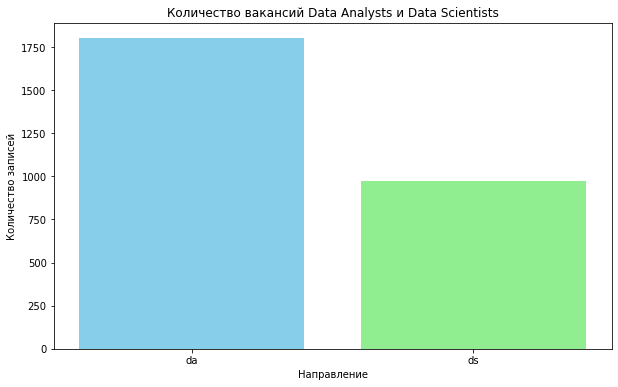

In [50]:
# Подсчет количества записей в разрезе 'direction'
pivot_table_count = df.pivot_table(
    index='direction',  # Индексируем по 'direction'
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index(name='count')

# Определение цветов для каждого столбца
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'orchid']

# Построение столбчатой диаграммы с разными цветами
plt.figure(figsize=(10, 6))
plt.bar(pivot_table_count['direction'], pivot_table_count['count'], color=colors[:len(pivot_table_count)])

# Настройка заголовка и меток осей
plt.title('Количество вакансий Data Analysts и Data Scientists')
plt.xlabel('Направление')
plt.ylabel('Количество записей')

# Отображение диаграммы
plt.show()

##### Вывод по доли грейдов по Data Analysts и Data Scientists

1. Отличия:<br>
    1.1 Доля вакансий по Senior (6+ years) Data Scientists (0.18) значительно выше Data Analysts (0.04)<br>
    1.2 Доля вакансий Junior (no experince) Data Scientists (0.04) наоборот значительно ниже Data Analysts (0.08).<br>
    Это связано с сложностью входа в профессию. При прочих равных в Data Scientists  зайти сложнее, чем в Data Analysts.<br>
    1.3 Количество вакансий Data Analysts (1801) значительно больше Data Scientists (974) <br>

 2. Сходства:<br>
    2.1 Одинаково в большей степени требуется для Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
    2.2 В меньше степени ищут Junior (no experince) и Senior (6+ years).<br>
        Потому что работодатели хотят видеть cпециалистов с хорошим опытом работы 3-5 лет.<br>
        Senior (6+ years) вакансий логично меньше, потому что такие позиций и специалистов значительно меньше и они более высокооплачиваемые.<br>


#### Типичное место работы для Data Analysts и Data Scientists
Определение типичного места работы для Data Analysts и Data Scientists по следующим параметрам: 
- топ-работодателей по числу вакансий 
- зарплата 
- тип занятости 
- график работы <br>
 В разрезе для грейдов Junior, Junior+, Middle, Senior.<br>

##### Добавил переменные da и ds фильтр по direction

In [51]:
da = df.query("direction == 'da'").copy()
# Фильтрация данных по направлению 'da'
ds = df.query("direction == 'ds'").copy()

##### Топ-работодателей по числу вакансий 

>da

In [52]:
# Построение сводной таблицы для подсчета количества записей
pivot_table = da.pivot_table(
    index='employer',  # Индексируем по 'employer'
    columns='experience_new',  # Значения 'experience_new' становятся столбцами
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index()

# Сортировка по сумме значений в строке (по всем столбцам, кроме 'employer')
pivot_table['total_count'] = pivot_table.drop(columns='employer').sum(axis=1)
sorted_pivot_table = pivot_table.sort_values(by='total_count', ascending=False).drop(columns='total_count').reset_index(drop=True)

# Отображение первых 5 строк отсортированной таблицы
sorted_pivot_table.head(5)

experience_new,employer,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,СБЕР,13,141,82,7
1,WILDBERRIES,1,11,28,3
2,Ozon,2,17,15,0
3,Банк ВТБ (ПАО),1,23,4,0
4,Т1,0,5,20,1


>ds

In [53]:
# Построение сводной таблицы для подсчета количества записей
pivot_table = ds.pivot_table(
    index='employer',  # Индексируем по 'employer'
    columns='experience_new',  # Значения 'experience_new' становятся столбцами
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index()

# Сортировка по сумме значений в строке (по всем столбцам, кроме 'employer')
pivot_table['total_count'] = pivot_table.drop(columns='employer').sum(axis=1)
sorted_pivot_table = pivot_table.sort_values(by='total_count', ascending=False).drop(columns='total_count').reset_index(drop=True)

# Отображение первых 5 строк отсортированной таблицы
sorted_pivot_table.head(5)

experience_new,employer,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,СБЕР,12,72,82,32
1,Ozon,4,7,21,4
2,Газпромбанк,0,7,7,10
3,Samokat.tech,1,4,10,5
4,Т1,0,7,11,1


> Топ работодателей:
1. банки (СБЕР со всеми подразделениями и ЮЛ и Банк ВТБ (ПАО))<br>
2. маркетплейсы (WILDBERRIES,Ozon,Samokat.tech)<br>

По топ работодателям нет существенных отличий по Data Analysts и Data Scientists.<br>

##### Зарплата 

In [54]:
# фильтрую без заглушек salary_avg
df_zp = df.query("salary_avg != -1")
df_zp.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,key_skills,schedule,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['power bi', 'субд', 'python', 'sql']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05


In [55]:
# Построение сводной таблицы для вычисления среднего значения salary_avg в разрезе грейдов
pivot_table_avg = df_zp.pivot_table(
    index='direction',  # Индексируем по 'direction'
    columns='experience_new',  # Значения 'experience_new' становятся столбцами
    values='salary_avg',  # Используем 'salary_avg' для вычисления среднего значения
    aggfunc='mean',  # Вычисление среднего значения
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index()

# Округление значений средней зарплаты до тысяч и преобразование их в тип int
# Преобразуем только числовые столбцы
numeric_columns = pivot_table_avg.select_dtypes(include=[np.number]).columns
pivot_table_avg[numeric_columns] = pivot_table_avg[numeric_columns].round(-4).astype(int)

# Сортировка по средней зарплате в порядке убывания по каждому из грейдов
sorted_pivot_table_avg = pivot_table_avg.sort_values(by=list(pivot_table_avg.columns[1:]), ascending=False).reset_index(drop=True)

# Отображение первых 5 строк отсортированной таблицы
sorted_pivot_table_avg.head(5)

experience_new,direction,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,ds,70000,140000,250000,320000
1,da,70000,110000,190000,250000


> Зарплата:  
В данных о зарплате большая доля пропусков.  
Но учитывая дополнительную информацию из внешних источников модно подтвердить, что Data Scientists  по грейдам  в среднем имеют более высокую заработную плату.  

##### Тип занятости 

In [56]:
# Построение сводной таблицы для подсчета количества записей в разрезе грейдов
pivot_table_count = df.pivot_table(
    index=['direction', 'employment'],  # Индексируем по 'direction' и 'employment'
    columns='experience_new',  # Значения 'experience_new' становятся столбцами
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index()

# Подсчет общего числа записей в DataFrame
total_records = len(df)

# Вычисление долей от общего числа записей
for col in pivot_table_count.columns[2:]:
    pivot_table_count[col] = pivot_table_count[col] / total_records

# Добавление столбца с общей долей по строке
pivot_table_count['total_share'] = pivot_table_count.iloc[:, 2:].sum(axis=1)

# Сортировка по общей доле в порядке убывания
sorted_pivot_table_count = pivot_table_count.sort_values(by='total_share', ascending=False).reset_index(drop=True)

# Отображение первых 5 строк отсортированной таблицы
sorted_pivot_table_count.head()

experience_new,direction,employment,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),total_share
0,da,Полная занятость,0.04,0.36,0.20,0.03,0.64
1,ds,Полная занятость,0.01,0.12,0.15,0.06,0.34
2,ds,Стажировка,0.01,0.00,0.00,0.00,0.01
3,da,Стажировка,0.01,0.00,0.00,0.00,0.01
4,da,Частичная занятость,0.00,0.00,0.00,0.00,0.01


> Тип занятости:

Лидирует полная занятость у всех специалистов - доля 0,97.  <br>
Остальные виды (стажировка, частичная и проектная работа) в сумме дают долю 0,03.  <br>

##### График работы

In [57]:
# Построение сводной таблицы для подсчета количества записей в разрезе грейдов
pivot_table_count = df.pivot_table(
    index=['direction', 'schedule'],  # Индексируем по 'direction' и 'schedule'
    columns='experience_new',  # Значения 'experience_new' становятся столбцами
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
).reset_index()

# Подсчет общего числа записей в DataFrame
total_records = len(df)

# Вычисление долей от общего числа записей
for col in pivot_table_count.columns[2:]:
    pivot_table_count[col] = pivot_table_count[col] / total_records

# Добавление столбца с общей долей по строке
pivot_table_count['total_share'] = pivot_table_count.iloc[:, 2:].sum(axis=1)

# Сортировка по общей доле в порядке убывания
sorted_pivot_table_count = pivot_table_count.sort_values(by='total_share', ascending=False).reset_index(drop=True)

# Отображение первых 5 строк отсортированной таблицы
sorted_pivot_table_count.head(5)

experience_new,direction,schedule,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),total_share
0,da,Полный день,0.04,0.31,0.15,0.02,0.52
1,ds,Полный день,0.01,0.09,0.11,0.05,0.26
2,da,Удаленная работа,0.01,0.05,0.05,0.01,0.11
3,ds,Удаленная работа,0.00,0.03,0.03,0.01,0.07
4,ds,Гибкий график,0.00,0.01,0.00,0.00,0.02


In [58]:
# Построение сводной таблицы для подсчета количества записей в разрезе 'direction' и 'schedule'
pivot_table_count = df.pivot_table(
    index=['direction'],  # Индексируем по 'direction'
    columns='schedule',  # Значения 'schedule' становятся столбцами
    aggfunc='size',  # Подсчет количества записей
    fill_value=0  # Заполнение отсутствующих значений нулями
)

# Вычисление долей внутри строки
pivot_table_count = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0)

# Сортировка по 'Удаленная работа' в порядке убывания
sorted_pivot_table_count = pivot_table_count.sort_values(by='Удаленная работа', ascending=False).reset_index()

# Отображение сводной таблицы
sorted_pivot_table_count


schedule,direction,Гибкий график,Полный день,Сменный график,Удаленная работа
0,ds,0.04,0.74,0.01,0.21
1,da,0.02,0.80,0.00,0.17


> График работы:

Лидирует полный график работы специалистов - доля 0,77. <br>
Удаленная работа с долей 0,21 немного больше у Data Scientists, чем у Data Analysts доля 0.17 <br>
Остальные виды (гибкий и сменный график) в сумме дают долю 0,03. <br>

 Одинаково в большей степени удаленная работа у Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
 В меньше степени удаленная работа у Junior (no experince) и Senior (6+ years).<br>

##### Вывод по типичному месту работы для Data Analysts и Data Scientists

1. Отличия:<br>

    1.1 По зарплате Data Scientists  по грейдам начиная с Junior+ (1-3 years) в среднем имеют более высокую заработную плату.<br>
    1.2 По графику работы удаленная работа с долей 0,21 немного больше у Data Scientists, чем у Data Analysts доля 0.17 <br>

2. Сходства:<br>
    2.1. По топ работодателям нет существенных отличий по Data Analysts и Data Scientists лидируют:<br>
    -  банки (СБЕР со всеми подразделениями и ЮЛ и Банк ВТБ (ПАО))<br>
    -  маркетплейсы (WILDBERRIES,Ozon,Samokat.tech)<br>

    2.2. По типу занятости нет существенных отличий по Data Analysts и Data Scientists
        Лидирует полная занятость у всех специалистов - доля 0,97.  <br>
        Остальные виды (стажировка, частичная и проектная работа) в сумме дают долю 0,03.  <br>

    2.3. По графику работы нет существенных отличий.<br>
        Лидирует полный график работы специалистов - доля 0,77 <br>
        Остальные виды (гибкий и сменный график) в сумме дают долю 0,03. <br>
        Одинаково в большей степени удаленная работа у Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
        В меньше степени удаленная работа у Junior (no experince) и Senior (6+ years).<br>

#### Востребованные навыки к грейдам и специальностям
Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.<br>

In [59]:
# Получение списка всех навыков и их количества.
# Проверял и больше 10 (чтобы уменьшить число уникальных значений) и больше 0,чтобы дополнить
skill_counts = {}
for skills in df['key_skills']:
    for skill in skills.split(', '):
        if skill in skill_counts:
            skill_counts[skill] += 1
        else:
            skill_counts[skill] = 1

# Отсечение навыков, которые встречаются меньше 10 раз
filtered_skills = {skill: count for skill, count in skill_counts.items() if count >= 10}

# Преобразование в DataFrame для сохранения в Excel
filtered_skills_df = pd.DataFrame(list(filtered_skills.items()), columns=['key_skills', 'count'])

# Сохранение в Excel
filtered_skills_df.to_excel('filtered_key_skills.xlsx', index=False)

In [60]:
hard_df = pd.read_excel('hard.xlsx', sheet_name='Sheet1')

# Предположим, что столбец с навыками называется 'Skills'
# Преобразуем столбец 'Skills' в список
hard_list = hard_df['hard_skills'].tolist()
print("Первые 5 значений в hard_list:", hard_list[:5])

Первые 5 значений в hard_list: ['a/b тесты', 'ad hoc analysis', 'airflow', 'api', 'atlassian jira']


In [61]:
soft_df= pd.read_excel('soft.xlsx', sheet_name='Sheet1')

# Предположим, что столбец с навыками называется 'Skills'
# Преобразуем столбец 'Skills' в список
soft_list = soft_df['soft_skills'].tolist()
print("Первые 5 значений в hard_list:", soft_list[:5])

Первые 5 значений в hard_list: ['адаптивность', 'аналитические способности', 'аналитический склад ума', 'аналитическое мышление', 'базы данных']


In [62]:
# Преобразование столбца строк в столбец списков
df['key_skills_list'] = df['key_skills'].apply(ast.literal_eval)

In [63]:
# Применяем функцию к колонке key_skills_list и создаем новые колонки soft_skill_present и hard_skill_present
df['soft'] = df['key_skills_list'].apply(lambda x: check_skills(x, soft_list))
df['hard'] = df['key_skills_list'].apply(lambda x: check_skills(x, hard_list))

# Дополнительная проверка столбца description, если в key_skills_list 'no info'
df['soft'] = df.apply(
    lambda row: check_skills(split_description(row['description']), soft_list) if row['soft'] == 'no info' else row['soft'],
    axis=1
)
df['hard'] = df.apply(
    lambda row: check_skills(split_description(row['description']), hard_list) if row['hard'] == 'no info' else row['hard'],
    axis=1
)

df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,...,employment,description,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year,key_skills_list,soft,hard
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05,"[power bi, субд, python, sql]",no info,"power bi, python, sql, субд"


In [64]:
# Подсчет количества упоминаний твердых и мягких навыков
soft_count = df['soft'].apply(lambda x: 0 if x == 'no info' else len(x.split(', '))).sum()
hard_count = df['hard'].apply(lambda x: 0 if x == 'no info' else len(x.split(', '))).sum()

print(f"Количество упоминаний мягких навыков: {soft_count}")
print(f"Количество упоминаний твердых навыков: {hard_count}")

Количество упоминаний мягких навыков: 2570
Количество упоминаний твердых навыков: 11325


In [65]:
# Подсчет количества упоминаний твердых и мягких навыков
df['soft_count'] = df['soft'].apply(lambda x: 0 if x == 'no info' else len(x.split(', ')))
# Создание сводной таблицы для подсчета количества записей по направлениям и грейдам
pivot_table_count = df.pivot_table(
    index='direction', columns='experience_new', values=['soft_count'], aggfunc='mean', fill_value=0
).reset_index()

pivot_table_count

direction            soft_count                      \
experience_new           Junior (no experince) Junior+ (1-3 years)   
0                     da                  1.61                1.18   
1                     ds                  0.49                0.51   

                                                     
experience_new Middle (3-6 years) Senior (6+ years)  
0                            1.05              0.67  
1                            0.52              0.43

In [66]:
df['hard_count'] = df['hard'].apply(lambda x: 0 if x == 'no info' else len(x.split(', ')))
# Создание сводной таблицы для подсчета количества записей по направлениям и грейдам
pivot_table_count = df.pivot_table(
    index='direction', columns='experience_new', values=['hard_count'], aggfunc='mean', fill_value=0
).reset_index()

pivot_table_count

direction            hard_count                      \
experience_new           Junior (no experince) Junior+ (1-3 years)   
0                     da                  2.93                3.84   
1                     ds                  3.39                4.03   

                                                     
experience_new Middle (3-6 years) Senior (6+ years)  
0                            4.55              4.60  
1                            4.31              4.39

<a id='section_id'></a>

In [67]:
# Получение уникальных значений из первого DataFrame
unique_skills_da = get_unique_skills(da)

# Получение уникальных значений из второго DataFrame
unique_skills_ds = get_unique_skills(ds)

# Подсчет количества уникальных значений
counter_da = Counter(unique_skills_da)
counter_ds = Counter(unique_skills_ds)

# Нахождение пересечения уникальных значений
common_skills = set(counter_da.keys()).intersection(set(counter_ds.keys()))

# Нахождение уникальных значений только в первом DataFrame
unique_to_da = set(counter_da.keys()).difference(set(counter_ds.keys()))

# Нахождение уникальных значений только во втором DataFrame
unique_to_ds = set(counter_ds.keys()).difference(set(counter_da.keys()))

# Подсчет и сортировка по убыванию для уникальных значений только в ds и da
unique_to_da_count = {skill: counter_da[skill] for skill in unique_to_da}
unique_to_ds_count = {skill: counter_ds[skill] for skill in unique_to_ds}

sorted_unique_to_da = sorted(unique_to_da_count.items(), key=lambda x: x[1], reverse=True)
sorted_unique_to_ds = sorted(unique_to_ds_count.items(), key=lambda x: x[1], reverse=True)

# Подсчет и сортировка по убыванию для общих уникальных значений
common_skills_count = {skill: counter_da[skill] + counter_ds[skill] for skill in common_skills}
sorted_common_skills = sorted(common_skills_count.items(), key=lambda x: x[1], reverse=True)


Общие уникальные значения (сортировка по убыванию):
sql: 1024
python: 1018
pandas: 723
анализ данных: 470
документация: 445
аналитическое мышление: 410
power bi: 293
ml: 292
коммуникация: 292
excel: 234


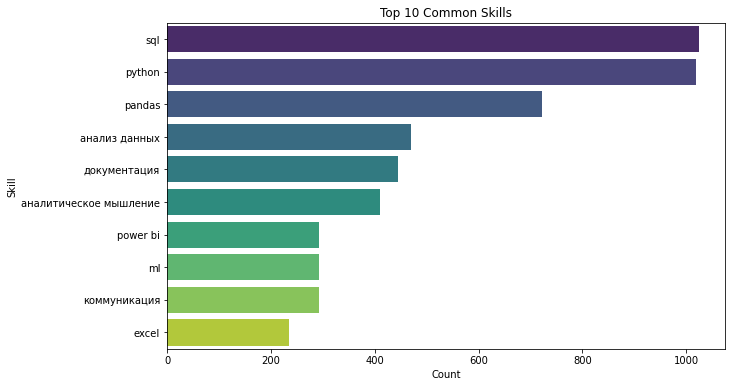


Уникальные значения только в первом DataFrame (сортировка по убыванию):
сводные таблицы: 42
подготовка презентаций: 32
power query: 28
bi: 27
визуализация данных: 27
подготовка отчетов: 23
анализ рынка: 21
bpmn: 21
маркетинговый анализ: 18
аналитические способности: 18


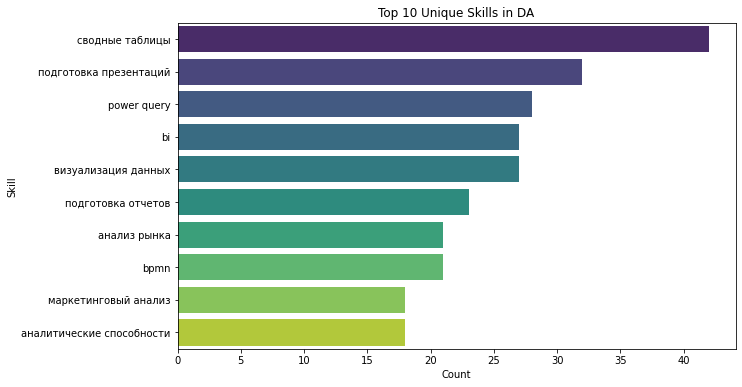


Уникальные значения только во втором DataFrame (сортировка по убыванию):
mlflow: 21
разработка поисковых технологий: 15
catboost: 9
умение планировать: 6
планирование карьеры: 6
information technology: 6
валидация моделей: 5
writing articles: 5
lgd: 5
yandex cloud platform: 5


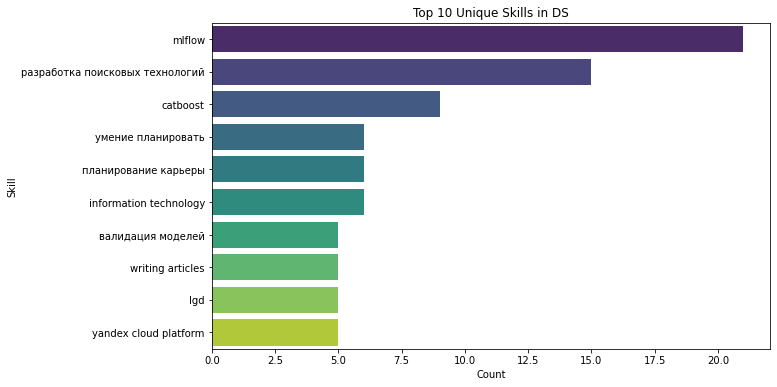

In [68]:
# Получение уникальных значений из первого DataFrame
unique_skills_da = get_unique_skills(da)

# Получение уникальных значений из второго DataFrame
unique_skills_ds = get_unique_skills(ds)

# Подсчет количества уникальных значений
counter_da = Counter(unique_skills_da)
counter_ds = Counter(unique_skills_ds)

# Нахождение пересечения уникальных значений
common_skills = set(counter_da.keys()).intersection(set(counter_ds.keys()))

# Нахождение уникальных значений только в первом DataFrame
unique_to_da = set(counter_da.keys()).difference(set(counter_ds.keys()))

# Нахождение уникальных значений только во втором DataFrame
unique_to_ds = set(counter_ds.keys()).difference(set(counter_da.keys()))

# Подсчет и сортировка по убыванию для уникальных значений только в ds и da
unique_to_da_count = {skill: counter_da[skill] for skill in unique_to_da}
unique_to_ds_count = {skill: counter_ds[skill] for skill in unique_to_ds}

sorted_unique_to_da = sorted(unique_to_da_count.items(), key=lambda x: x[1], reverse=True)
sorted_unique_to_ds = sorted(unique_to_ds_count.items(), key=lambda x: x[1], reverse=True)

# Подсчет и сортировка по убыванию для общих уникальных значений
common_skills_count = {skill: counter_da[skill] + counter_ds[skill] for skill in common_skills}
sorted_common_skills = sorted(common_skills_count.items(), key=lambda x: x[1], reverse=True)

# Визуализация
def plot_skills(skills, title):
    skills_df = pd.DataFrame(skills, columns=['skill', 'count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(data=skills_df, x='count', y='skill', palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()

# Визуализация общих уникальных значений
print("\nОбщие уникальные значения (сортировка по убыванию):")
for skill, count in sorted_common_skills[:10]:
    print (f"{skill}: {count}")

plot_skills(sorted_common_skills[:10], 'Top 10 Common Skills')

# Визуализация уникальных значений для первого DataFrame
print("\nУникальные значения только в первом DataFrame (сортировка по убыванию):")
for skill, count in sorted_unique_to_da[:10]:
    print(f"{skill}: {count}")

plot_skills(sorted_unique_to_da[:10], 'Top 10 Unique Skills in DA')

# Визуализация уникальных значений для второго DataFrame
print("\nУникальные значения только во втором DataFrame (сортировка по убыванию):")
for skill, count in sorted_unique_to_ds[:10]:
    print(f"{skill}: {count}")

plot_skills(sorted_unique_to_ds[:10], 'Top 10 Unique Skills in DS')

##### Вывод востребованные навыки к грейдам и специальностям

1. Твердые навыки спрашивают  значительно чаще чем мягкие по Data Analysts и Data Scientists .<br>
2. Требуемое среднее количество мягких навыков, по Data Analysts и Data Scientists  от Junior к Senior уменьшается, а твердых наоборот увеличивается.<br>

3. Общие уникальные значения (сортировка по убыванию):<br>

    Хард<br>
 - sql: 1024
 - python: 1018
 - pandas: 723
 - анализ данных: 470
 - power bi: 293
 - ml: 292
 - excel: 234

    Софт<br>
 - аналитическое мышление: 410<br>
 - коммуникация: 292<br>

4. Уникальные значения только в da (сортировка по убыванию):<br>
 - сводные таблицы: 42
 - подготовка презентаций: 32
 - power query: 28
 - визуализация данных: 27
 - bi: 27
 - подготовка отчетов: 23
 - анализ рынка: 21
 - bpmn: 21
 - маркетинговый анализ: 18
 - dax: 18

5. Уникальные значения только в ds (сортировка по убыванию):<br>
    Хард<br>
 - mlflow: 21
 - разработка поисковых технологий: 15
 - catboost: 9
 - information technology: 6
 - lgd: 5
 - dvc: 5
 - fluent english: 5
 - yandex cloud platform: 5

    Софт<br>
 - планирование карьеры: 6
 - умение планировать: 6

#### Наиболее желаемые кандидаты
Определение наиболее желаемых кандидатов на вакансии Data Analysts и Data Scientists  по следующим параметрам: самые важные hard-skils, самые важные soft-skils. <br>
В разрезе грейдов Junior, Junior+, Middle, Senior.<br>

In [69]:
# Фильтрация данных по специальностям
da = df.query("direction == 'da'")
ds = df.query("direction == 'ds'")


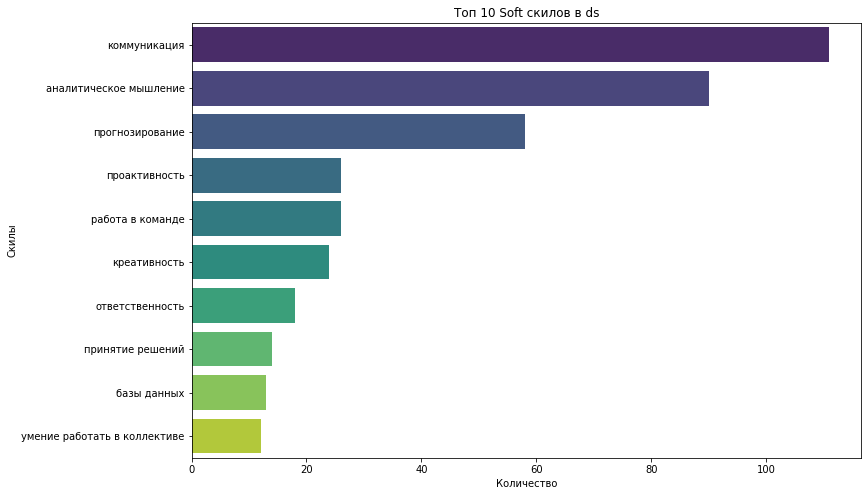

In [70]:
# Анализ для направления 'ds' и soft skills
results = analyze_skills(df, 'ds', 'soft')


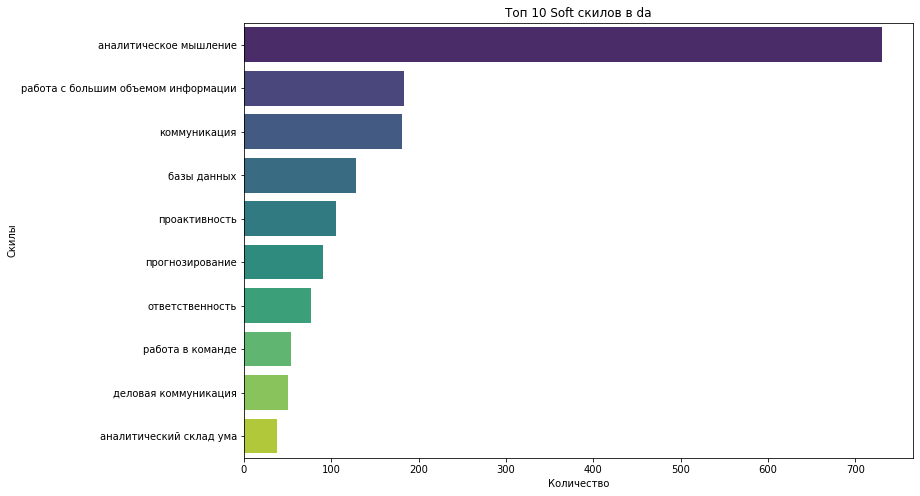

In [71]:
# Анализ для направления 'da' и soft skills
results = analyze_skills(df, 'da', 'soft')

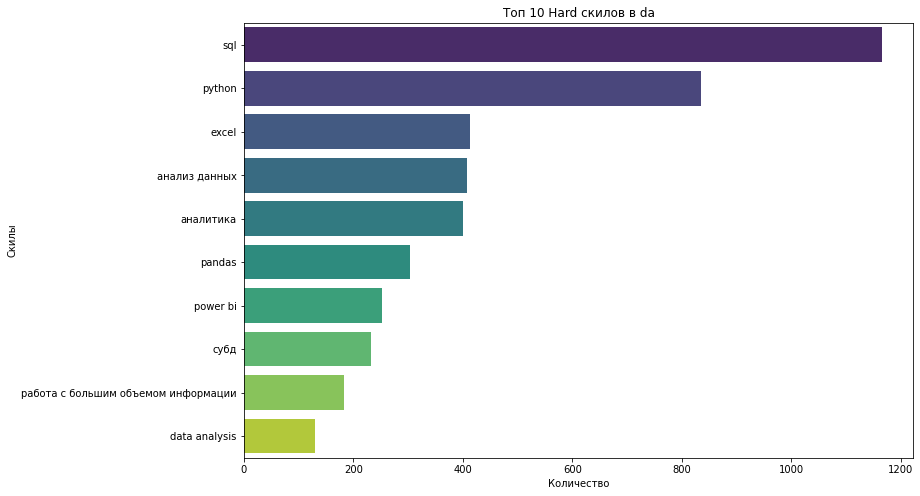

In [72]:
# # Анализ для направления 'da' и hard skills
results = analyze_skills(df, 'da', 'hard')

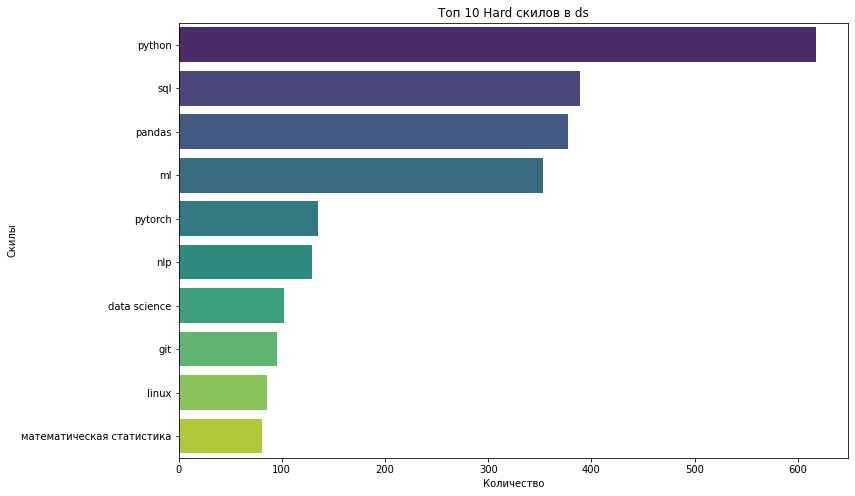

In [73]:
# Анализ для направления 'da' и hard skills
results = analyze_skills(df, 'ds', 'hard')

##### Вывод наиболее желаемые кандидаты 
 См. столбчатую диаграмму или презентацию

#### Динамики количества вакансий по месяцам
Расчет помесячной динамики количества вакансий для Data Analysts и Data Scientists .<br>
В разрезе грейдов Junior, Junior+, Middle, Senior.<br>

In [74]:
df.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,...,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year,key_skills_list,soft,hard,soft_count,hard_count
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05,"[power bi, субд, python, sql]",no info,"power bi, python, sql, субд",0,4


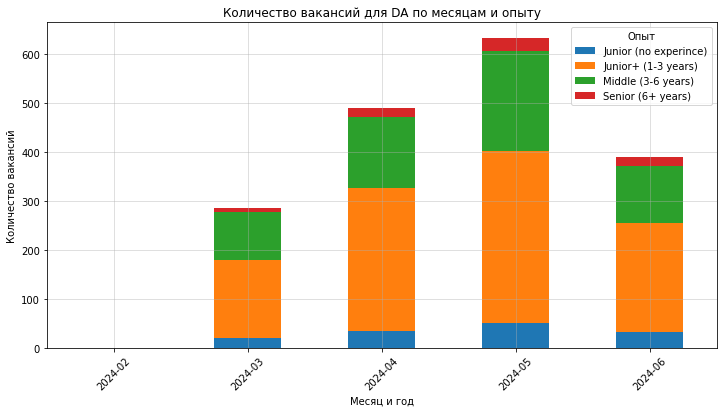

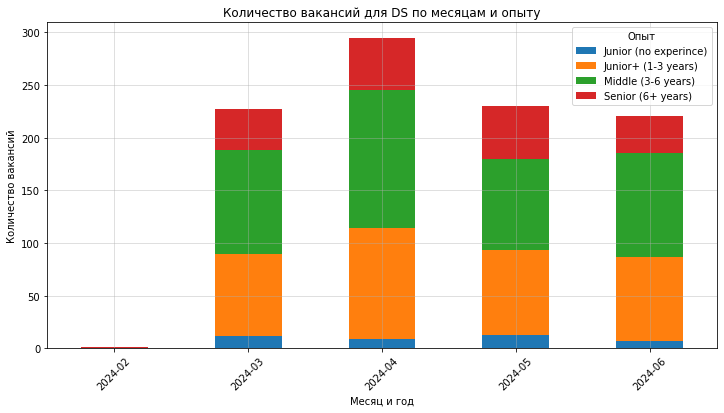

In [75]:
# Группировка данных по месяцам, профессиям и грейдам и подсчет количества вакансий
monthly_counts = df.groupby(['direction', 'month_year', 'experience_new']).agg({'id': 'count'}).reset_index()

# Фильтрация данных для 'da' и 'ds'
da_data = monthly_counts[monthly_counts['direction'] == 'da']
ds_data = monthly_counts[monthly_counts['direction'] == 'ds']

# Создание сводной таблицы для данных 'da'
da_pivot = da_data.pivot_table(index='month_year', columns='experience_new', values='id', fill_value=0)

# Построение столбчатой диаграммы для 'da'
da_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Количество вакансий для DA по месяцам и опыту')
plt.xlabel('Месяц и год')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.legend(title='Опыт')
plt.grid(True, alpha=0.5)  # Добавление сетки с прозрачностью
plt.show()

# Создание сводной таблицы для данных 'ds'
ds_pivot = ds_data.pivot_table(index='month_year', columns='experience_new', values='id', fill_value=0)

# Построение столбчатой диаграммы для 'ds'
ds_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Количество вакансий для DS по месяцам и опыту')
plt.xlabel('Месяц и год')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.legend(title='Опыт')
plt.grid(True, alpha=0.5)  # Добавление сетки с прозрачностью
plt.show()

In [76]:
da.head(1)

,direction,id,name,published_at,alternate_url,type,employer,department,area,experience_new,...,description_lemmatized,salary_bin,key_skills_from_key_skills_field,salary_avg,month_year,key_skills_list,soft,hard,soft_count,hard_count
0,da,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),...,наш направление заниматься повышение эффективн...,ЗП не указана,"SQL, Power BI, Python, СУБД","60,000.00",2024-05,"[power bi, субд, python, sql]",no info,"power bi, python, sql, субд",0,4


##### Вывод динамика количества вакансий по месяцам
  
В данных информация только за три полных  месяца с марта по май (февраль и июнь не полные данные).
За этот период количество вакансий
 - Data Analysts -  растет за весь период
 - Data Scientists -  март - апрель растет, а май падает.


#### Вывод по исследовательскому анализу данных

1. Выявить грейд требуемых специалистов <br>
Заполнил столбец experience_new грейдами вакансий на основании столбца 'name' и 'experience'<br>


2. Вывод по доли грейдов по Data Analysts и Data Scientists

    2.1 Отличия:<br>
    2.1.1 Доля вакансий по Senior (6+ years) Data Scientists (0.18) значительно выше Data Analysts (0.04)<br>
    2.1.2 Доля вакансий Junior (no experince) Data Scientists (0.04) наоборот значительно ниже Data Analysts (0.08).<br>
    Это связано с сложностью входа в профессию. При прочих равных в Data Scientists  зайти сложнее, чем в Data Analysts.<br>
    2.1.3 Количество вакансий Data Analysts (1801) значительно больше Data Scientists (974) <br>

    2.2 Сходства:<br>
    2.2.1 Одинаково в большей степени требуется для Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
    2.2.2 В меньше степени ищут Junior (no experince) и Senior (6+ years).<br>
    Потому что работодатели хотят видеть cпециалистов с хорошим опытом работы 3-5 лет.<br>
    Senior (6+ years) вакансий логично меньше, потому что такие позиций и специалистов значительно меньше и они более высокооплачиваемые.<br>

        
3. Вывод по типичному месту работы для Data Analysts и Data Scientists<br>

    3.1 Отличия:<br>

    3.1.1 По зарплате Data Scientists  по грейдам начиная с Junior+ (1-3 years) в среднем имеют более высокую заработную плату.<br>
    3.1.2 По графику работы удаленная работа с долей 0,21 немного больше у Data Scientists, чем у Data Analysts доля 0.17 <br>

    3.2. Сходства:<br>
    3.2.1. По топ работодателям нет существенных отличий по Data Analysts и Data Scientists лидируют:<br>
    -  банки (СБЕР со всеми подразделениями и ЮЛ и Банк ВТБ (ПАО))<br>
    -  маркетплейсы (WILDBERRIES,Ozon,Samokat.tech)<br>

    3.2.2. По типу занятости нет существенных отличий по Data Analysts и Data Scientists
    Лидирует полная занятость у всех специалистов - доля 0,97.  <br>
    Остальные виды (стажировка, частичная и проектная работа) в сумме дают долю 0,03.  <br>

    3.2.3. По графику работы нет существенных отличий.<br>
    Лидирует полный график работы специалистов - доля 0,77 <br>
    Остальные виды (гибкий и сменный график) в сумме дают долю 0,03. <br>
    Одинаково в большей степени удаленная работа у Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
    В меньше степени удаленная работа у Junior (no experince) и Senior (6+ years).<br>


4. Вывод востребованные навыки к грейдам и специальностям

    4.1 Твердые навыки спрашивают  значительно чаще чем мягкие по Data Analysts и Data Scientists .<br>
    4.2 Требуемое среднее количество мягких навыков, по Data Analysts и Data Scientists  от Junior к Senior уменьшается, а твердых наоборот увеличивается.<br>
    4.3 Общие уникальные значения (сортировка по убыванию):<br>

    
    Хард  
     - sql: 1024
     - python: 1018
     - pandas: 723
     - анализ данных: 470
     - power bi: 293
     - ml: 292
     - excel: 234


    Софт  
     - аналитическое мышление: 410   
     - коммуникация: 292   

    4.4 Уникальные Хард значения только в da (сортировка по убыванию):   
    
     - сводные таблицы: 42
     - подготовка презентаций: 32
     - power query: 28
     - визуализация данных: 27
     - bi: 27
     - подготовка отчетов: 23
     - анализ рынка: 21
     - bpmn: 21
     - маркетинговый анализ: 18
     - dax: 18

5. Уникальные значения только в ds (сортировка по убыванию):<br>


    Хард  
     - mlflow: 21
     - разработка поисковых технологий: 15
     - catboost: 9
     - information technology: 6
     - lgd: 5
     - dvc: 5
     - fluent english: 5
     - yandex cloud platform: 5
     

    Софт  
     - планирование карьеры: 6
     - умение планировать: 6

6. Наиболее желаемые кандидаты
    Выводы в столбчатых диаграммах


7. Динамики количества вакансий по месяцам
    Выводы в столбчатых диаграммах

### Общие выводы

#### Анализ данных вакансий сайта HH.ru

##### Описание проекта
1. Заказчик: Рекрутинговое агентство  
2. Цель проекта: предоставить рекрутинговому агентству детализированный и обоснованный анализ различий в вакансиях для Data Analysts и Data Scientists. Это позволит агентству лучше понимать требования и ожидания рынка труда для этих позиций, а также улучшить процесс подбора подходящих кандидатов.
3. Задачи: Выявить различия в предлагаемых вакансиях для Data Analystsи Data Scientists.

Исходные данные
1. Данные получены из API сайта HH.ru
2. Период предоставленных данных:

    Data Analysts:  
    min дата - 13.02.2024  
    max дата - 11.06.2024 

    Data Scientists:  
    min дата - 29.02.2024  
    max дата - 11.06.2024   

3. Для анализа дополнительно использовался сайт HH.ru


##### Описание данных

`id` - Уникальный идентификатор вакансии.<br>
`name` - Название вакансии.<br>
`published_at` - Дата публикации.<br>
`alternate_url` - Ссылка на вакансию.<br>
`type` - Статус вакансии на момент получения данных от api и передачи 
их в базу. <br>
`employer` - Работодатель.<br>
`department` - Работодатель, отдел.<br>
`area` - Регион места работы.<br>
`experience` - Требуемый опыт работы.<br>
`key_skills`- Ключевые навыки, в том числе найденные при анализе <br>
`полного` текста вакансии. Поле генерируется после получения 
информации от api. <br>
`schedule` - График работы.<br>
`employment` - Тип занятости.<br>
`description` - Описание вакансии.<br>
`description_lemmatized` - Лемматизированное описание вакансии.<br>
`salary_from` - Нижняя граница предлагаемой заработной платы.<br>
`salary_to` - Верхняя граница предлагаемой заработной платы.<br>
`salary_bin` - Категория зарплаты.<br>
`key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии
`key_skills`.<br>
`hard_skills_from_description` - “Твердые” навыки, найденные при 
обработке полей с навыками. Поле генерируется после получения 
информации от api. soft_skills_from_description - “Мягкие” навыки, 
найденные при обработке полей с навыками. Поле генерируется после 
получения информации от api.<br>
`soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. При желании можно дополнить.

##### Вывод по знакомству с данными

1. В распоряжении предоставлены два файла в формате xlsx:

 - vacancies_da.xlsx  - вакансии Data Analysts
 - vacancies_ds.xlsx  - вакансии Data Scientists
 
2. В данных есть пропуски<br> 

Столбцы с большой долей пропущенных значений:
 - salary_to  
 - salary_from  
 - soft_skills_from_description  
 - department  
 - hard_skills_from_description - дропнули  
 - key_skills_from_key_skills_field - дропнули  

3. Для знакомства с даными применили функцию `inspect`

##### Вывод по предобработке данных

1. Объеденение файлов.   <br>

    Общее количество строк -  2775 и 18 столбцов.<br>

2. Преобразование значений столбцов<br>

    2.1 Приведение значений в столбце 'key_skills' к нижнему регистру<br>
    2.2 Заменил точечно наименования в столбцах name, key_skills<br>
    2.3 Заменил точечно значение в столбце salary_from<br>



3. Задали необходимые функции для обработки данных:<br>

    3.1 `display_unique_values` - отображает количество уникальных значений для нечисловых столбцов DataFrame<br>
    3.2 `analyze_missing_values` - анализирует пропуски в DataFrame, отображая долю и количество пропусков по столбцам.<br>
    3.3 `determine_experience` - предназначена для заполнения столбца experience_new на основе информации, содержащейся в столбце name и, при необходимости, в столбце experience. Она анализирует строку name и определяет уровень опыта (например, Middle или Senior) в зависимости от наличия определенных ключевых слов.<br>
    3.4 `check_skills` - является часть для заполнения столбцов `soft` и `hard`<br>
    3.5 `split_description` - для разбиения строки description на список навыков<br>
    3.6 `parse_skills` - для конвертации строки в список<br>
    3.7 `get_unique_skills` - для обработки DataFrame и получения уникальных значений в столбце 'key_skills'<br>
    3.8 `analyze_skills` - анализирует навыки (hard или soft skills) в вакансиях по определенному направлению (например, Data Analysis или Data Science) и по уровням опыта (грейдам). Она подсчитывает частоту упоминания каждого навыка для каждого уровня опыта и возвращает результирующий DataFrame с этой информацией.<br>


4. Добавили/удалили столбцы для обработки данных:<br>

    4.1 `salary_avg` - средняя зарплата по столбцам 'salary_from' и 'salary_to'. <br>
Если заполнено одно значение, то возвращаем его.<br>
Если оба не заполнены, то ставим заглушку  `- 1`.  <br>
`80.43%`  пропусков значений в столбце `salary_avg`<br>
    4.2 `experience_new` - заполнили столбец грейдами вакансий на основании столбца 'name' и 'experience'<br>
    4.3 `month_year` - выделили из столбца `published_at` с месяц и год.<br>
    4.4 Удалили столбцы `salary_from`,   `salary_to`,   `experience`.   <br>


5. Работа с пропусками и дубликатами:<br>

    5.1. Полных дубликатов в данных нет. <br> 

    5.2. В данных присутствуют столбцы с большой долей пропусков:<br>
     - department    -                       0.66  <br>
     - key_skills_from_key_skills_field   - 0.42.  <br>

    5.3. В результате объединения файлов ds и da появились дубли по id.<br>
        Удалять дубли не буду потому что это по сути две вакансии da и ds<br>

    5.4. Многие вакансии размещаются по несколько раз и отличаются только датой размещения. <br> 
        Удалять не буду т.к. точно не известно это дубли вакансий, потому что закончился срок размещения или поиск еще одного сотрудника.<br>


6. Категориальные значения<br>

    6.1 В данных присутствуют уникальные значения, которые мы можем объяснить, которые не мешают анализу.<br>
Одновременно в таких столбцах как:<br>
    - `key_skills` - много уникальных, но они в виде списка, с которым можно работать.<br>
    - `description` - практически каждая ячейка уникальна, но в ней много полезной информации.  <br>

    6.2 Далее при анализе будем опираться на столбец `key_skills`, в случае отсутствия в нем данных будем пподтягивать из `description`<br>


##### Вывод по исследовательскому анализу данных

1. Выявить грейд требуемых специалистов <br>
Заполнил столбец experience_new грейдами вакансий на основании столбца 'name' и 'experience'<br>


2. Вывод по доли грейдов по Data Analysts и Data Scientists

    2.1 Отличия:<br>
    2.1.1 Доля вакансий по Senior (6+ years) Data Scientists (0.18) значительно выше Data Analysts (0.04)<br>
    2.1.2 Доля вакансий Junior (no experince) Data Scientists (0.04) наоборот значительно ниже Data Analysts (0.08).<br>
    Это связано с сложностью входа в профессию. При прочих равных в Data Scientists  зайти сложнее, чем в Data Analysts.<br>
    2.1.3 Количество вакансий Data Analysts (1801) значительно больше Data Scientists (974) <br>

    2.2 Сходства:<br>
    2.2.1 Одинаково в большей степени требуется для Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
    2.2.2 В меньше степени ищут Junior (no experince) и Senior (6+ years).<br>
    Потому что работодатели хотят видеть cпециалистов с хорошим опытом работы 3-5 лет.<br>
    Senior (6+ years) вакансий логично меньше, потому что такие позиций и специалистов значительно меньше и они более высокооплачиваемые.<br>

        
3. Вывод по типичному месту работы для Data Analysts и Data Scientists<br>

    3.1 Отличия:<br>

    3.1.1 По зарплате Data Scientists  по грейдам начиная с Junior+ (1-3 years) в среднем имеют более высокую заработную плату.<br>
    3.1.2 По графику работы удаленная работа с долей 0,21 немного больше у Data Scientists, чем у Data Analysts доля 0.17 <br>

    3.2. Сходства:<br>
    3.2.1. По топ работодателям нет существенных отличий по Data Analysts и Data Scientists лидируют:<br>
    -  банки (СБЕР со всеми подразделениями и ЮЛ и Банк ВТБ (ПАО))<br>
    -  маркетплейсы (WILDBERRIES,Ozon,Samokat.tech)<br>

    3.2.2. По типу занятости нет существенных отличий по Data Analysts и Data Scientists
    Лидирует полная занятость у всех специалистов - доля 0,97.  <br>
    Остальные виды (стажировка, частичная и проектная работа) в сумме дают долю 0,03.  <br>

    3.2.3. По графику работы нет существенных отличий.<br>
    Лидирует полный график работы специалистов - доля 0,77 <br>
    Остальные виды (гибкий и сменный график) в сумме дают долю 0,03. <br>
    Одинаково в большей степени удаленная работа у Data Analysts и Data Scientists - Junior+ (1-3 years) и Middle (3-6 years).<br>
    В меньше степени удаленная работа у Junior (no experince) и Senior (6+ years).<br>
    

4. Вывод востребованные навыки к грейдам и специальностям

    4.1 Твердые навыки спрашивают  значительно чаще чем мягкие по Data Analysts и Data Scientists .<br>
    4.2 Требуемое среднее количество мягких навыков, по Data Analysts и Data Scientists  от Junior к Senior уменьшается, а твердых наоборот увеличивается.<br>

    4.3 Общие уникальные значения (сортировка по убыванию):<br>


    Хард  
     - sql: 1024
     - python: 1018
     - pandas: 723
     - анализ данных: 470
     - power bi: 293
     - ml: 292
     - excel: 234


    Софт  
     - аналитическое мышление: 410   
     - коммуникация: 292   

    4.4 Уникальные Хард значения только в da (сортировка по убыванию):   
    
     - сводные таблицы: 42
     - подготовка презентаций: 32
     - power query: 28
     - визуализация данных: 27
     - bi: 27
     - подготовка отчетов: 23
     - анализ рынка: 21
     - bpmn: 21
     - маркетинговый анализ: 18
     - dax: 18

5. Уникальные значения только в ds (сортировка по убыванию):   


    Хард   
     - mlflow: 21
     - разработка поисковых технологий: 15
     - catboost: 9
     - information technology: 6
     - lgd: 5
     - dvc: 5
     - fluent english: 5
     - yandex cloud platform: 5
     

    Софт  
     - планирование карьеры: 6
     - умение планировать: 6

6. Наиболее желаемые кандидаты 
 См. столбчатую диаграмму или презентацию

7. Динамики количества вакансий по месяцам
См. столбчатую диаграмму или презентацию
В данных информация только за три полных  месяца с марта по май (февраль и июнь не полные данные).
За этот период количество вакансий
 - Data Analysts -  растет за весь период
 - Data Scientists -  март - апрель растет, а май падает.